In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

from keras import layers, models

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# decode the comment sequence
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # this following line will make the position which shows in sequence to 1 in res
        res[i, sequence] = 1.
    return res

In [5]:
# vectorize the sequence
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# vectorize and change the data type of train data
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
y_train.shape

(25000,)

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

### what is cross entropy and why we pick it as loss funciton
Cross entropy is a reasonable way for measuring how close or how far is our prediction probability to the target probability. More specific visit https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 160us/step - loss: 0.4493 - acc: 0.8167 - val_loss: 0.3341 - val_acc: 0.8794
Epoch 2/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2550 - acc: 0.9094 - val_loss: 0.3164 - val_acc: 0.8708
Epoch 3/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1969 - acc: 0.9299 - val_loss: 0.2821 - val_acc: 0.8884
Epoch 4/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1669 - acc: 0.9410 - val_loss: 0.2946 - val_acc: 0.8832
Epoch 5/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.1432 - acc: 0.9487 - val_loss: 0.3226 - val_acc: 0.8783
Epoch 6/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.1267 - acc: 0.9559 - val_loss: 0.3484 - val_acc: 0.8728
Epoch 7/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.1129 - acc: 0.9608 - val_loss: 0.3612 - val_a

In [11]:
def plot_loss(epochs, loss_values, val_loss_values):
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

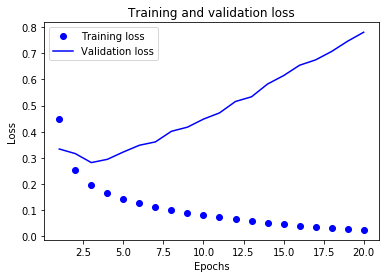

In [12]:
# these bunch of code may crush on OSX mojave, so I put the plot logic in a function
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

plot_loss(epochs, loss_values, val_loss_values)

From this graph we can say that
- As the epochs growth, the loss function decline significantly on training data at the start, but slow down after aproximately epochs 3.
- seems like there is a honey point at epochs 3.
- As the trainning times increase, the loss increase in validation data, overfit occur.

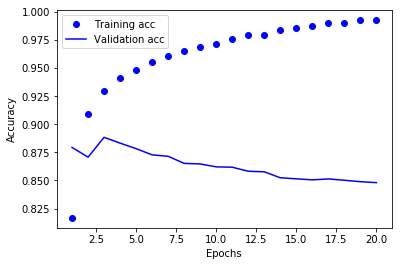

In [22]:
# accuracy plot, which shows that overfitting occur, the best strategy to solve this is reduce the epochs
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The accuracy graph prove our guess which overfit occur.

In [17]:
# retrain another model on the same dataset
model = models.Sequential()
# the first hidden layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# the second hidden layer
model.add(layers.Dense(16, activation='relu'))
# output layer
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.4630 - acc: 0.8268
Epoch 2/4
25000/25000 [==============================] - 1s 53us/step - loss: 0.2680 - acc: 0.9060
Epoch 3/4
25000/25000 [==============================] - 1s 53us/step - loss: 0.2063 - acc: 0.9255
Epoch 4/4
25000/25000 [==============================] - 1s 54us/step


[0.3058222448539734, 0.8778]

In [18]:
model.predict(x_test)

array([[0.14088833],
       [0.9998566 ],
       [0.65302837],
       ...,
       [0.07480596],
       [0.04849826],
       [0.40213904]], dtype=float32)

In [20]:
# improvement test about about model
model = models.Sequential()
# the first hidden layer
model.add(layers.Dense(500, activation='tanh', input_shape=(10000,)))
# the second hidden layer
model.add(layers.Dense(500, activation='tanh'))
# output layer
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=128)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 17s 663us/step - loss: 0.1221 - acc: 0.8364
Epoch 2/4
25000/25000 [==============================] - 18s 702us/step - loss: 0.0656 - acc: 0.9132
Epoch 3/4
25000/25000 [==============================] - 17s 685us/step - loss: 0.0521 - acc: 0.9334
Epoch 4/4
25000/25000 [==============================] - 4s 167us/step


[0.12327587148189545, 0.84164]

Seems like the accuracy falls back

#### things I tried
- use mse as loss function
- use tanh as activation function
- use more hidden unit

## what did I learn from this chapter?

- Most of the time, we need to process the raw data, for example tranform them into proper tensor, in order to fit in NN. The word series can coded in binary code (1 for appear, 0 for not), but there are some other coding style.
- Stack of Dense layers which using relu as activation function are frequently used to solve lots of classification problems.
- For binary classification problem, the output layer should have only one node(unless softmax is used), represent the probability of one of the occurence. For the above example, it represent the probability of positive comment.
- For these kind of question, binary_crossentropy is a good loss function.
- rmsprop optimizer always good (why?)
- As the model perform well on the trainning, the model may finally overfit. it will consequently perform worse on new data. Beware of how the model perform on new data.